## get distance along thalweg and quickly plot (not on a projected map)

In [13]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt

#### extraction code for thalweg data (mostly from nancy's fxns)

In [42]:
def haversine(lon1, lat1, lon2, lat2):
    """Calculate the great-circle distance in kilometers between two points
    on a sphere from their longitudes and latitudes.
    Reference: http://www.movable-type.co.uk/scripts/latlong.html
    :arg lon1: Longitude of point 1.
    :type lon1: float or :py:class:`numpy.ndarray`
    :arg lat1: Latitude of point 1.
    :type lat1: float or :py:class:`numpy.ndarray`
    :arg lon2: Longitude of point 2.
    :type lon2: float or :py:class:`numpy.ndarray`
    :arg lat2: Latitude of point 2.
    :type lat2: float or :py:class:`numpy.ndarray`
    :returns: Great-circle distance between two points in km
    :rtype: float or :py:class:`numpy.ndarray`
    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

def distance_along_curve(lons, lats):
    """Calculate cumulative distance between points in lons, lats
    :arg lons: longitude points
    :type lons: numpy array
    :arg lats: latitude points
    :type lats: numpy array
    :returns: dist, a numpy array with distance along track
    """
    dist = [0]
    for i in np.arange(1, lons.shape[0]):
        newdist = dist[i-1] + haversine(lons[i], lats[i],
                                                  lons[i-1], lats[i-1])
        dist.append(newdist)
    dist = np.array(dist)
    return dist


def load_thalweg(
    gdept, lons, lats,
    filename='/data/nsoontie/MEOPAR/tools/bathymetry/thalweg_working.txt'
):
    """Thalweg grid indices, depths and disatance.
    :arg gdept: full model depth array (shape 40x898x398)
    :type gdept: numpy array
    :arg lons: model longitude array (shape 898x398)
    :type lons: numpy array
    :arg lats: model latitude array (shape 898x398)
    :type lats: numpy array
    :returns: tpoints, gdept_thal, xx_thal
    An array of thalweg grid indices, depths and distance.
    """
    tpoints = np.loadtxt(filename, delimiter=' ', dtype=int)
    gdept_thal = gdept[:, tpoints[:, 0], tpoints[:, 1]]
    lons_thal = lons[tpoints[:, 0], tpoints[:, 1]]
    lats_thal = lats[tpoints[:, 0], tpoints[:, 1]]
    xx_thal = distance_along_curve(lons_thal, lats_thal)
    xx_thal = xx_thal + np.zeros(gdept_thal.shape)
    return tpoints, gdept_thal, xx_thal, lons_thal, lats_thal




#### load required data

In [43]:
grid_B = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')
mesh_mask = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/mesh_mask201702.nc')
lons = grid_B['nav_lon'][:]
lats = grid_B['nav_lat'][:]
gdept = mesh_mask.variables['gdept_0'][0,:,:,:]

#### use the load_thalweg function to get what we need

In [24]:
thalweg_points, gdept_thal, xx_thal, lons_thal, lats_thal = load_thalweg(gdept, lons, lats)
distance_along_thalweg = xx_thal[0,:]
thalweg_xs = thalweg_points[:,1]
thalweg_ys = thalweg_points[:,0]

### we now have several useful arrays that we can use in whatever map we want:

    -lons_thal 
    -lats_thal
    -distance_along_thalweg
    -thalweg_xs
    -thalweg_ys
    
I haven't projected onto mapping software because I don't know what you use, but we can look at what we have just in a plot of thalweg points as lats and lons. We will highlight one point and annotate it

Text(0, 0.5, 'latitude')

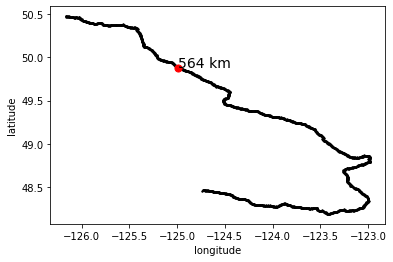

In [55]:
#what index along the thalweg do we want?
index_along_thalweg = 1200
#here's the distance label
distance_label = f'{int(distance_along_thalweg[index_along_thalweg])} km'
plt.figure()
#here we are plotting all the thalweg points
plt.scatter(lons_thal, lats_thal, marker = 'o', s = 2, color = 'k')

## here we are making the point that we wanted (above) red
plt.scatter(lons_thal[index_along_thalweg], lats_thal[index_along_thalweg],  marker = 'o', s = 50, color = 'r')
# here we are annotating it - you can move it a
plt.text(lons_thal[index_along_thalweg], lats_thal[index_along_thalweg], distance_label, fontsize = 14)
plt.xlabel('longitude')
plt.ylabel('latitude')

(1540, 2)

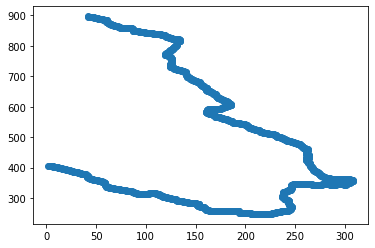